In [1]:
import drawSvg as draw
from opensimplex import OpenSimplex
from math import pi, sin, cos
import random

gen = OpenSimplex(seed=123)

In [2]:
def loop(n = 180, orad=200, irad=80, res = 100, skipfunc=lambda x: x % 6 == 0, 
         noise_ri=2, noise_ro=2, noise_coeff=8, lap=False, dumb_boost=1,boost=0,reverse=False, ends=True):
    canvas = draw.Drawing(600, 600, center=(0,0), displayInline=False)
    lines = []
    mid = (irad + orad) / 2 - irad
    mood = (irad + orad) / 2
    rev = 1 if not reverse else -1
    thetas = []
    lol = []
    total = 0
    for i in range(n):
        thuta = i/n * 2 * pi
        noise_x, noise_y = noise_ri * cos(thuta), noise_ri * sin(thuta)
        noi = gen.noise2d(noise_x, noise_y)
        total += (1 + noi)
        lol.append(total)
    for l in lol:
        thetas.append(l*2*pi/total)
    for theta in thetas:
        midx = mid * sin(rev * theta) + 400
        midy = mid * cos(rev * theta) + 400
        line = []
        noise_x, noise_y = 0, 0
        for j in range(res):
            theta2 = j / res * pi + theta * dumb_boost
            thetuwu = theta2
            if lap:
                thetuwu = j/res*2*pi + theta
            thetuwu += theta * boost
            noise_z, noise_w = noise_ro * cos(rev * thetuwu), noise_ro * sin(rev * thetuwu)
            noise = gen.noise4d(noise_x, noise_y, noise_z, noise_w)
            mod = mood + noise * noise_coeff
            offx = mod * sin(rev * theta2)
            offy = mod * cos(rev * theta2)
            line.append((midx + offx, midy + offy))
        lines.append(line)
    ring1 = []
    ring2 = []
    ring3 = []
    bonus = []
    derp = False
    for i,line in enumerate(lines):
        ring1.extend(line[0])
        ring2.extend(line[-1])
        if skipfunc(i):
            continue        
        if ring3:
            x, y= ring3[-2:]
            x2, y2 = line[0]
            if not derp:
                x2, y2 = line[-1]
            if ((x - x2)**2 + (y-y2)**2) > 60**2:
                bonus.append(ring3)
                ring3 = []
        if derp:
            for pair in line:
                ring3.extend(pair)
        else:
            for pair in line[::-1]:
                ring3.extend(pair)
            
        derp = not derp
    canvas.append(draw.Lines(*ring3, close=False, fill='none', stroke='black'))
    if ends:
        canvas.append(draw.Lines(*ring1, close=True, fill='none', stroke='black'))
        canvas.append(draw.Lines(*ring2, close=True, fill='none', stroke='black'))
    for line in bonus:
        canvas.append(draw.Lines(*line, close=False, fill='none', stroke='black'))
    print(len(bonus))
    canvas.setPixelScale(.5)
    display(canvas.rasterize())

In [3]:
def fancy_skip_func(x):
    return random.random() < 0.2

def lol(rate):
    return lambda x: random.random() < rate

0


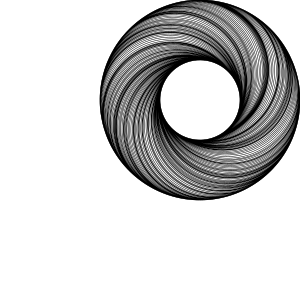

In [4]:
loop(noise_ro=0, noise_ri=12, skipfunc=lambda x: 0)

0


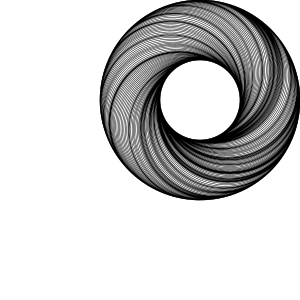

In [5]:
loop(noise_ro=0, noise_ri=9, skipfunc=lambda x: 0)

In [6]:
def memoize(f):
    cache = {}
    def lol(n):
        if n in cache:
            return cache[n]
        result = f(n)
        cache[n] = result
        return result
    return lol

@memoize
def hailstone(n):
    
    if n <= 1:
        return 0
    if n % 2:
        return 1 + hailstone(n*3 + 1)
    return 1 + hailstone(n//2)

def lolfunc(x):
    return hailstone(x) % 6 == 1

0


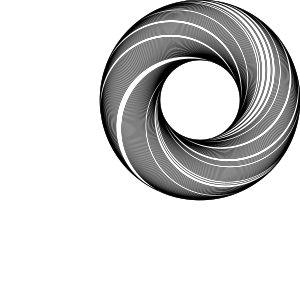

In [7]:
loop(noise_ro=0, noise_ri=0, skipfunc=lolfunc)

0


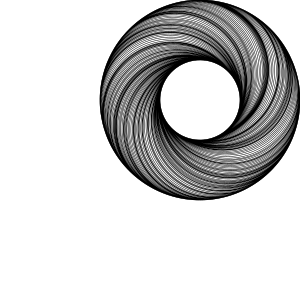

In [8]:
loop(noise_ro=0, noise_ri=12, n=180, skipfunc=lambda x: 0)

0


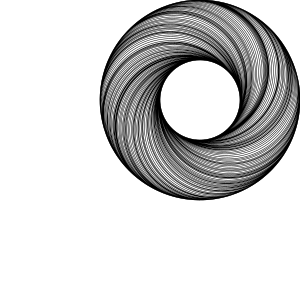

In [9]:
loop(noise_ro=0, noise_ri=12, n=160, skipfunc=lambda x: 0)